## Análise Exploratória de dados Comerciais - Performance de Vendas 

A análise foi feita para fins de estudo e prática. O dataset utilizado simula um pequeno recorte de um cenário real de uma franquia, com dados de vendas que variam de 2012 a 2015.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go

In [23]:
df = pd.read_excel('Dados_Comerciais.xlsx')

In [24]:
df.shape

(457, 14)

In [25]:
df.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Comissão (Percentual),Data Venda,ValorVenda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,3,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,3,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,5,2012-04-04,459.89,234


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID-Produto             457 non-null    object        
 1   Produto                457 non-null    object        
 2   Categoria              457 non-null    object        
 3   Segmento               457 non-null    object        
 4   Fabricante             457 non-null    object        
 5   Loja                   457 non-null    object        
 6   Cidade                 457 non-null    object        
 7   Estado                 457 non-null    object        
 8   Vendedor               457 non-null    object        
 9   ID-Vendedor            457 non-null    int64         
 10  Comissão (Percentual)  457 non-null    int64         
 11  Data Venda             457 non-null    datetime64[ns]
 12  ValorVenda             457 non-null    float64       
 13  Custo

In [27]:
total_por_categoria = df.groupby('Categoria')['ValorVenda'].sum()
print(total_por_categoria)

Categoria
Celulares            98602.00
Eletrodomésticos    193322.11
Eletroportáteis      19055.45
Eletrônicos          48329.55
Name: ValorVenda, dtype: float64


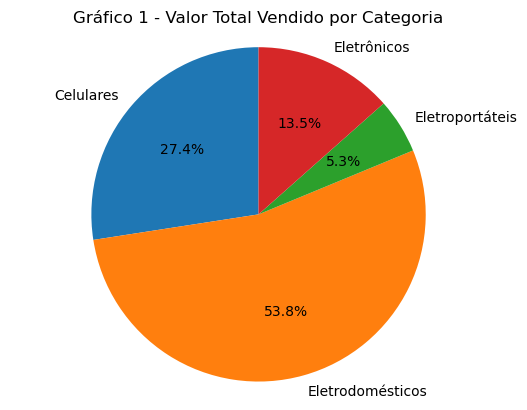

In [28]:
labels = 'Celulares', 'Eletrodomésticos', 'Eletroportáteis', 'Eletrônicos'
sizes = [98602.00, 193322.11, 19055.45, 48329.55]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Gráfico 1 - Valor Total Vendido por Categoria")
ax1.axis('equal')
plt.show()

In [29]:
contagem_segmento_categoria = df.groupby(['Segmento', 'Categoria']).size()
print(contagem_segmento_categoria)

Segmento     Categoria       
Corporativo  Celulares            17
             Eletrônicos          24
Doméstico    Celulares            30
             Eletrodomésticos    215
             Eletroportáteis     124
             Eletrônicos          36
Industrial   Eletrodomésticos     11
dtype: int64


In [30]:
# Consumo por segmento
consumo_por_segmento = df.groupby('Segmento')['ValorVenda'].sum()
print(consumo_por_segmento)

Segmento
Corporativo     89952.65
Doméstico      256801.46
Industrial      12555.00
Name: ValorVenda, dtype: float64


In [32]:
fig2 = go.Figure(go.Funnel(
    y = ["Doméstico","Corporativo", "Industrial"],
    x = [256801.46, 89952.65, 12555.00],
    textinfo = "value+percent initial"
))
fig2.update_layout(title="Gráfico 2 - Total de valor de vendas por segmento")
fig2.show()

In [37]:
maior_mes_consumo = df.groupby([df['Data Venda'].dt.month, 'Categoria'])['ValorVenda'].sum()
# print(maior_mes_consumo)

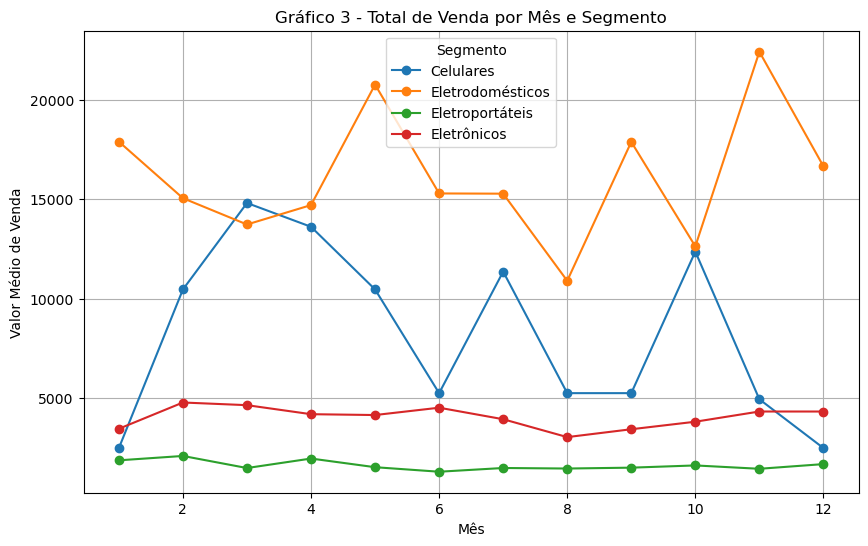

In [34]:
# Transforma a Series com MultiIndex em DataFrame, onde cada coluna corresponde a um 'Segmento'
maior_mes_consumo_df = maior_mes_consumo.unstack()

maior_mes_consumo_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel("Mês")
plt.ylabel("Valor Médio de Venda")
plt.title("Gráfico 3 - Total de Venda por Mês e Segmento")
plt.legend(title="Segmento")
plt.grid(True)
plt.show()

Categorias como eletroportáteis e eletrônicos possuem maior estabilidade, enquanto celulares e eletrodomésticos possuem maior sazionalidade.
Pode-se observar que o maior pico de vendas de eletrodomésticos se dá em novembro, podendo estar relacionado à Black Friday.

In [14]:
# Venda por fabricante
venda_por_fabricante = df.groupby('Fabricante')['ValorVenda'].sum()
print(venda_por_fabricante)

Fabricante
Brastemp      92786.30
Britânia      10373.45
Consul        58897.22
Dell          12823.54
Electrolux     6690.02
Epson          7872.46
HP            18285.44
LG            10682.57
Motorola      35340.00
Panasonic     12775.00
Samsung       82736.00
Sony          10047.11
Name: ValorVenda, dtype: float64


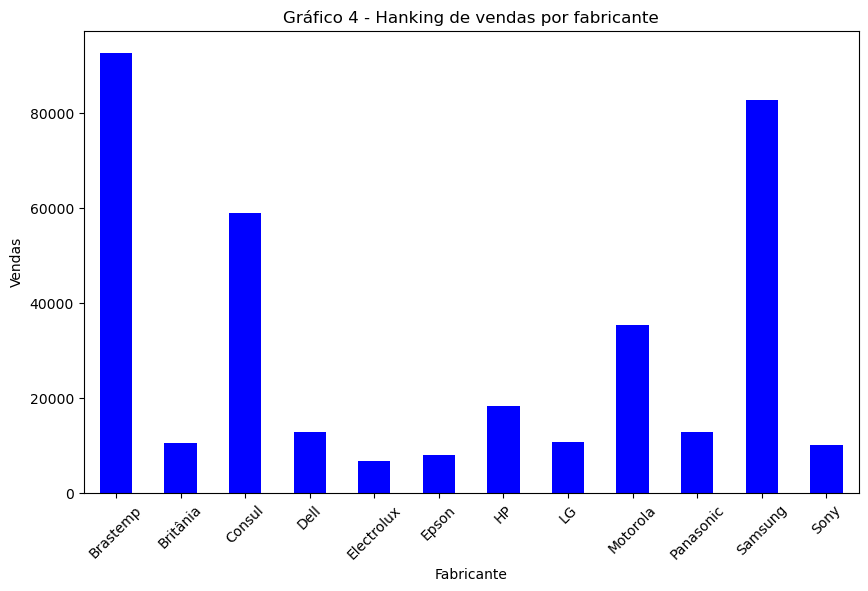

In [35]:
plt.figure(figsize=(10, 6))
venda_por_fabricante.plot(kind="bar", color='blue')
plt.title("Gráfico 4 - Hanking de vendas por fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Vendas")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Produto mais vendido de cada fabricante
df_group = df.groupby(['Fabricante', 'Categoria'])['ValorVenda'].sum().reset_index()

idx_max = df_group.groupby('Fabricante')['ValorVenda'].idxmax()

top_categoria_por_fabricante = df_group.loc[idx_max]

print(top_categoria_por_fabricante)

    Fabricante         Categoria  ValorVenda
0     Brastemp  Eletrodomésticos    92786.30
1     Britânia   Eletroportáteis    10373.45
2       Consul  Eletrodomésticos    58897.22
3         Dell       Eletrônicos    12823.54
4   Electrolux  Eletrodomésticos     6690.02
5        Epson       Eletrônicos     7872.46
6           HP       Eletrônicos    18285.44
8           LG  Eletrodomésticos     7567.57
10    Motorola         Celulares    35340.00
11   Panasonic  Eletrodomésticos    12775.00
12     Samsung         Celulares    61884.00
16        Sony       Eletrônicos     9348.11


In [17]:
categoria_por_fabricante = df. groupby('Fabricante')['Categoria'].unique()
print(categoria_por_fabricante)

Fabricante
Brastemp                                  [Eletrodomésticos]
Britânia                                   [Eletroportáteis]
Consul                                    [Eletrodomésticos]
Dell                                           [Eletrônicos]
Electrolux                                [Eletrodomésticos]
Epson                                          [Eletrônicos]
HP                                             [Eletrônicos]
LG            [Celulares, Eletrodomésticos, Eletroportáteis]
Motorola                                         [Celulares]
Panasonic                                 [Eletrodomésticos]
Samsung       [Eletroportáteis, Eletrodomésticos, Celulares]
Sony                                [Eletrônicos, Celulares]
Name: Categoria, dtype: object


A **Brastemp** é a primeira fabricante no hanking de vendas, o que pode ser explicado por ser fabricante que mais vendeu eletrodomésticos que, por sua vez, é a categoria com maior quantidade e valor total em vendas.

A **Samsung** vem em segundo lugar, sendo a lider em vendas de celulares (segunda categorial com maior total de vendas), além de também vender eletroportáteis e eletrodomésticos.

E a **Consul** vem em terceiro, sendo a segunda que mais vendeu eletrodomésticos.

In [18]:
vendas_cidade = df.groupby('Cidade')['ValorVenda'].sum()
print(vendas_cidade)

Cidade
Belo Horizonte     38298.87
Campinas            7998.00
Campos              5031.00
Cascavel            2265.90
Osasco             12621.00
Petrópolis          2515.45
Rio de Janeiro     99749.56
Salvador            2940.00
São Paulo         163085.56
Vitória            24803.77
Name: ValorVenda, dtype: float64


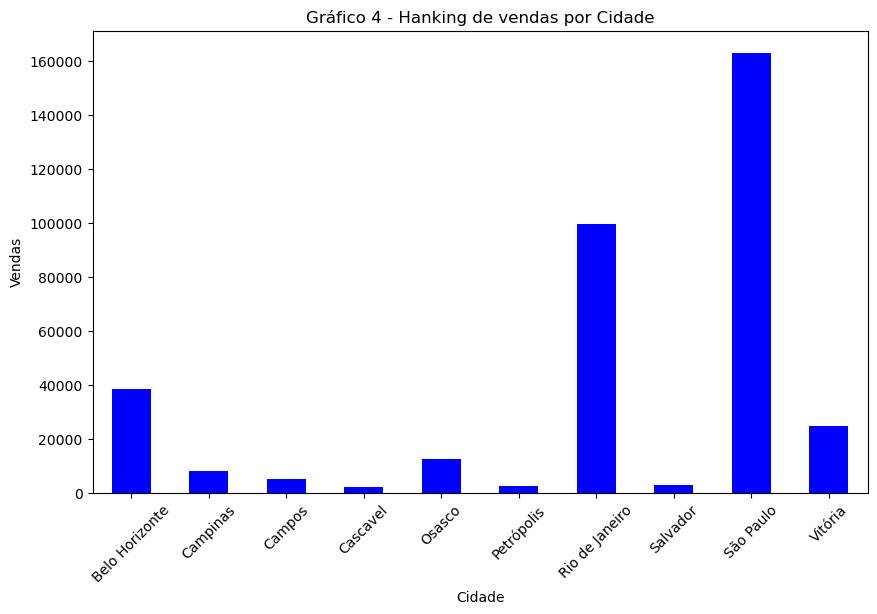

In [19]:
plt.figure(figsize=(10, 6))
vendas_cidade.plot(kind="bar", color='blue')
plt.title("Gráfico 4 - Hanking de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Vendas")
plt.xticks(rotation=45)
plt.show()

In [20]:
vendas_cidade_segmento = df.groupby(['Cidade', 'Segmento'])['ValorVenda'].sum()
print(vendas_cidade_segmento)

Cidade          Segmento   
Belo Horizonte  Corporativo      6243.87
                Doméstico       30865.00
                Industrial       1190.00
Campinas        Corporativo      7998.00
Campos          Doméstico        5031.00
Cascavel        Doméstico        1810.90
                Industrial        455.00
Osasco          Corporativo     11997.00
                Doméstico         624.00
Petrópolis      Doméstico        2515.45
Rio de Janeiro  Corporativo      4827.89
                Doméstico       92353.67
                Industrial       2568.00
Salvador        Doméstico         242.00
                Industrial       2698.00
São Paulo       Corporativo     49414.12
                Doméstico      109317.44
                Industrial       4354.00
Vitória         Corporativo      9471.77
                Doméstico       14042.00
                Industrial       1290.00
Name: ValorVenda, dtype: float64


O hanking de Vendas por cidade segue a lógica de que quanto mais pessoas, mais consumo, já que São Paulo e Rio de Janeiro são as cidades mais populosas do brasil e lideram o hanking de vendas.

**Conclusão da Análise Exploratória de Dados Comerciais - Performance de Vendas**

A análise dos dados comerciais permitiu obter insights valiosos sobre a performance de vendas da franquia no período de 2012 a 2015. Abaixo estão os principais achados:

1. **Categorias e Volume de Vendas:**
   - A categoria com maior volume de valor de vendas foi "Eletrodomésticos", representando aproximadamente 53,8% do total de vendas.
   - "Celulares" e "Eletrônicos" também tiveram uma participação significativa, enquanto "Eletroportáteis" apresentou menor volume de vendas.

2. **Segmentos de Mercado:**
   - O segmento "Doméstico" foi responsável pela maior parte das vendas, atingindo um total de R$ 256.801,46.
   - O segmento "Corporativo" representou uma fração considerável das vendas, com R$ 89.952,65.
   - O segmento "Industrial" apresentou menor volume de vendas, com R$ 12.555,00.

3. **Sazonalidade das Vendas:**
   - As categorias "Celulares" e "Eletrodomésticos" apresentaram picos sazonais mais acentuados.
   - O maior volume de vendas de eletrodomésticos ocorreu em novembro, possivelmente impulsionado pela Black Friday.
   - "Eletrônicos" e "Eletroportáteis" mostraram um comportamento mais estável ao longo do ano.

4. **Performance por Fabricante:**
   - A Brastemp foi a líder de vendas, seguida por Samsung, Consul e Motorola.
   - A Brastemp se destacou nos "Eletrodomésticos", enquanto a Motorola dominou o segmento de "Celulares".
   - Outros fabricantes, como Dell, Epson e HP, tiveram uma participação expressiva no segmento de "Eletrônicos".

5. **Produtos Mais Vendidos por Fabricante:**
   - Os eletrodomésticos da Brastemp, Consul e Electrolux foram os mais comercializados dentro de suas respectivas marcas.
   - Os celulares da Motorola tiveram grande destaque em volume de vendas.
   - Os eletrônicos da Dell, Epson e HP se consolidaram como principais dentro desse segmento.

**Considerações Finais:**

A análise permitiu identificar padrões de comportamento de vendas e segmentação de mercado, sendo útil para futuras estratégias comerciais. A sazonalidade observada pode ser explorada para campanhas promocionais, e a concentração de vendas em determinadas marcas pode orientar a gestão de estoque e parcerias estratégicas. O próximo passo poderia envolver uma análise mais aprofundada de margens de lucro, custos e comportamento dos clientes para otimizar a performance do negócio.

